Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0163 - val_loss: 0.0079
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0027 - val_loss: 0.0067
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - val_loss: 0.0079
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - val_loss: 0.0069
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - val_loss: 0.0070
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - val_loss: 0.0074
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0010 - val_loss: 0.0087
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - val_loss: 0.0043
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - val_loss: 0.0058
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.9404e-04 - val_loss: 0.0099
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 0

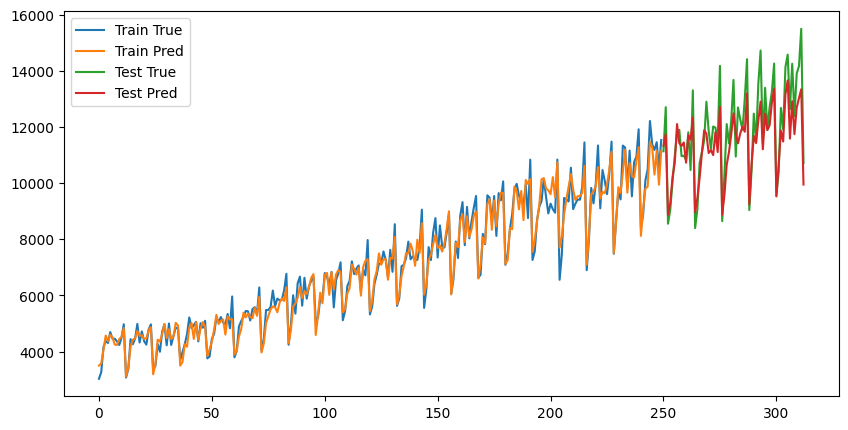

In [3]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# 1️⃣ 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

# 2️⃣ 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# 3️⃣ 시퀀스 생성
window = 12
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

# 4️⃣ Train/Test 분리
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5️⃣ 🔹 RNN 모델
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 6️⃣ 학습
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=8,
                    validation_data=(X_test, y_test),
                    verbose=1)

# 7️⃣ 예측
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# 8️⃣ 역정규화
y_train_inv = scaler.inverse_transform(y_train)
y_test_inv = scaler.inverse_transform(y_test)
train_pred_inv = scaler.inverse_transform(train_pred)
test_pred_inv = scaler.inverse_transform(test_pred)

# 9️⃣ 오차 계산
train_mse = mean_squared_error(y_train_inv, train_pred_inv)
test_mse  = mean_squared_error(y_test_inv, test_pred_inv)
train_mae = mean_absolute_error(y_train_inv, train_pred_inv)
test_mae  = mean_absolute_error(y_test_inv, test_pred_inv)

print(f"🔹 Train MSE: {train_mse:.4f}")
print(f"🔹 Test  MSE: {test_mse:.4f}")
print(f"🔹 Train MAE: {train_mae:.4f}")
print(f"🔹 Test  MAE: {test_mae:.4f}")

# 🔟 시각화
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(y_train_inv)), y_train_inv, label='Train True')
plt.plot(np.arange(len(y_train_inv)), train_pred_inv, label='Train Pred')
plt.plot(np.arange(len(y_train_inv), len(y_train_inv)+len(y_test_inv)), y_test_inv, label='Test True')
plt.plot(np.arange(len(y_train_inv), len(y_train_inv)+len(y_test_inv)), test_pred_inv, label='Test Pred')
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0454 - val_loss: 0.0430
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0084 - val_loss: 0.0156
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0059 - val_loss: 0.0144
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0052 - val_loss: 0.0146
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0048 - val_loss: 0.0141
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0053 - val_loss: 0.0142
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0048 - val_loss: 0.0141
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0055 - val_loss: 0.0182
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0052 - val_loss: 0.0146
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0050 - val_loss: 0.0155
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0055 - val_loss: 0.0138
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0043 - val_los

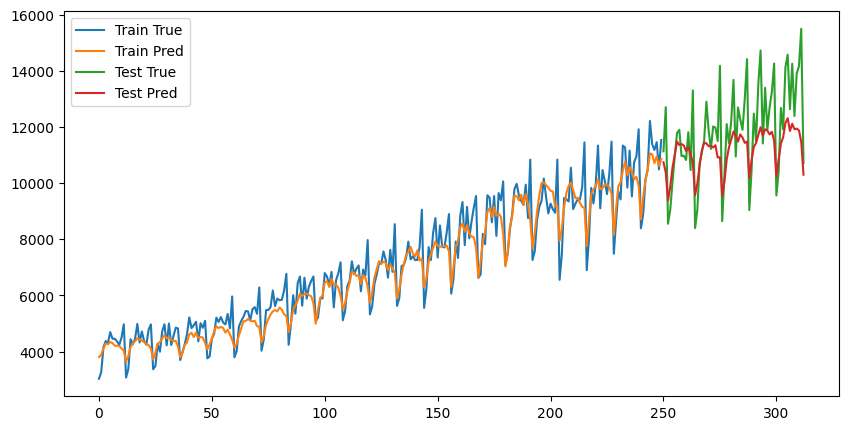

In [4]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# 1️⃣ 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

# 2️⃣ 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# 3️⃣ 시퀀스 생성
window = 12
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

# 4️⃣ Train/Test 분리
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5️⃣ 🔹 LSTM 모델
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 6️⃣ 학습
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=8,
                    validation_data=(X_test, y_test),
                    verbose=1)

# 7️⃣ 예측
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# 8️⃣ 역정규화
y_train_inv = scaler.inverse_transform(y_train)
y_test_inv = scaler.inverse_transform(y_test)
train_pred_inv = scaler.inverse_transform(train_pred)
test_pred_inv = scaler.inverse_transform(test_pred)

# 9️⃣ 오차 계산
train_mse = mean_squared_error(y_train_inv, train_pred_inv)
test_mse  = mean_squared_error(y_test_inv, test_pred_inv)
train_mae = mean_absolute_error(y_train_inv, train_pred_inv)
test_mae  = mean_absolute_error(y_test_inv, test_pred_inv)

print(f"🔹 Train MSE: {train_mse:.4f}")
print(f"🔹 Test  MSE: {test_mse:.4f}")
print(f"🔹 Train MAE: {train_mae:.4f}")
print(f"🔹 Test  MAE: {test_mae:.4f}")

# 🔟 시각화
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(y_train_inv)), y_train_inv, label='Train True')
plt.plot(np.arange(len(y_train_inv)), train_pred_inv, label='Train Pred')
plt.plot(np.arange(len(y_train_inv), len(y_train_inv)+len(y_test_inv)), y_test_inv, label='Test True')
plt.plot(np.arange(len(y_train_inv), len(y_train_inv)+len(y_test_inv)), test_pred_inv, label='Test Pred')
plt.legend()
plt.show()
